<div style="background-color:rgb(227, 250, 252); vertical-align: middle; padding:24px 0;">
<p style="color:blue; font-family:arial; font-size:24px; text-align:center"><b>Sinais Elementares e Operações Básicas</b></p>
<p style="font-size:11px; color:grey; text-align:right">Jupyter Notebook p/ Python 3.x</p>
</div>

## 1. Objetivos

<ul><li>Conhecer os sinais elementares de tempo contínuo e discreto;</li>
<li>Realizar simulações computacionais para gerar e exibir os sinais elementares;</li>
<li>Realizar operações com sinais elementares.</li>

## 2. Motivação

**Engenharia de Controle e Automação de Sistemas** - controle/automação do que?

De sistemas elétricos, mecânicos, eletromecânicos, eletrônicos, embarcados ... 
O que fazem os sistemas? Eles processam (transformam) informações (sinais) via ações determinadas conforme o controle desejado (resultados).
Como são representadas as informações? Através de sinais (elétricos, mecânicos, eletromagnéticos ...).

Ou seja, precisamos conhecer os sinais e as transformações (operações aplicadas aos/pelos sistemas) mais usuais para fazermos análise/síntese dos sistemas, realizando o controle desejado de tais sistemas ([Engenharia de Controle](eng_controle.ipynb)), como mostra a **Figura 1**.

<img src="img/eng_controle.png" height=400 width=650>
<figcaption><b>Figura 1</b> -  Exemplos de sistemas: a) Sem controle; b) Controle em Malha Aberta; c) Controle com Realimentação.</figcaption>

## 3. Fundamentação Teórica

<div style="background-color:rgb(207, 250, 232); text-align:left; vertical-align: middle; padding:20px 0;">
    <p style="color:blue; font-family:verdana; font-size:20px"><b>3.1 Sinais Elementares</b></p>
</div>

Os sinais elementares aparecem com maior frequência no estudo dos sistemas lineares, dentre os quais se destacam: o degrau unitário, o impulso unitário, a rampa, os sinais exponenciais e senoidais. Esses sinais são usados na construção de sinais mais complexos.
<ul><li><p style="color:blue; background-color: rgb(231,245,249); font-family:verdana; font-size:15px"><b>Impulso Unitário</b> (Delta de Dirac)</li></ul></p>

O sinal **Impulso Unitário** de tempo contínuo, $\delta(t)$ (delta minúsculo), também é conhecido como a função matemática **Delta de Dirac**, que tende ao infinito no ponto zero e é nula no restante do eixo real. A integral da função Delta de Dirac em toda reta (área) **é definida** como tendo valor 1. [Wikipédia](https://pt.wikipedia.org/wiki/Delta_de_Dirac)

O sinal análogo ao **Delta de Dirac** no domínio discreto é a função **Delta de Kronecker**, a qual vale 1 na origem ($n=0$) e 0 para nos outros tempos ($n\ne0$). O sinal **Impulso Unitário** de tempo contínuo é definido pelas seguintes relações:

$$\delta(t)=0\;\;\;\textrm{para}\;\;t\neq0$$

$$\int_{-\infty}^{\infty}\delta(t)dt=1$$

In [22]:
# @hidden
from IPython.display import HTML
HTML('''<script>
        code_show=true; 
        function code_toggle() {
           if (code_show) {
              $('.cm-comment:contains(@hidden)').closest('div.input').hide();
           } else {
              $('.cm-comment:contains(@hidden)').closest('div.input').show();
           }
           code_show = !code_show
        } 
        $( document ).ready(code_toggle);
        </script>
        O código desta célula está oculta para facilitar a leitura e mostrar que é possível esconder células...
        Para comutar (liga/desl.) a visualização do código, clique <a href="javascript:code_toggle()">aqui</a>.''')

In [18]:
# Código HTML/CSS para centralizar as figuras (gráficos)
from IPython.core.display import HTML
HTML("""<style> .output_png {display: table-cell; text-align: center; vertical-align: middle;} </style>""")

In [19]:
%matplotlib inline
from numpy import linspace, zeros, pi, cos, sin, exp, where
from pylab import plot, stem, grid, xlabel, ylabel, title, ylim, \
                  figure, subplot, tight_layout, axis, legend, text

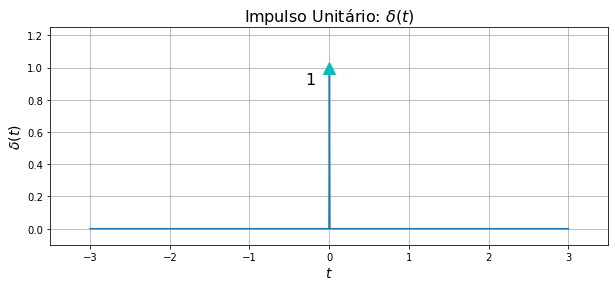

In [20]:
# Sinal Elementar: Impulso Unitário de tempo contínuo - delta(t)
t = linspace(-3,3,1000)
dDirac = zeros(1000,dtype=float)                 # delta de Dirac
dDirac[int(len(dDirac)/2)] = 1.                  # impulso de área 1 na origem (t = 0)

figure(figsize=(10, 4))                          # cria o quadro da figura (container do gráfico)
plot(t,dDirac,0.,1.,'^c', markersize=12)         # traça o gráfico
axis((-3.5,3.5,-0.1,1.25)); grid(True)           # limites dos eixos e linhas de grade
text(-0.3, 0.9, "1",size=16)                     # posiciona texto (anotação) sobre o gráfico
xlabel('$t$',fontsize=14)                        # rótulo do eixo x
ylabel('$\delta(t)$',fontsize=14)                # rótulo do eixo y
title(u'Impulso Unitário: $\delta(t)$',size=16); # título do gráfico

<ul><li><p style="color:blue; background-color: rgb(231,245,249); font-family:verdana; font-size:15px"><b>Degrau Unitário</b> (Função de Heaviside)</p></li>

A função matemática de Heaviside, $hs(x)$, é definida por:  
$$hs(x)=\left \{  
\begin{matrix}  
0 \;\;\; \textrm{se} \;\;x<0 \\  
1 \;\;\; \textrm{se} \;\;x=0 \\  
1\;\;\;\textrm{se}\;\;x>0 \\  
\end{matrix} \right. $$  

O sinal **Degrau Unitário** de tempo contínuo, comumente representado por $u(t)$, é definido por:

$$u(t)=\left\{\begin{matrix}
1,\;\;t\geq0\\ 
0,\;\;t<0
\end{matrix}\right.$$

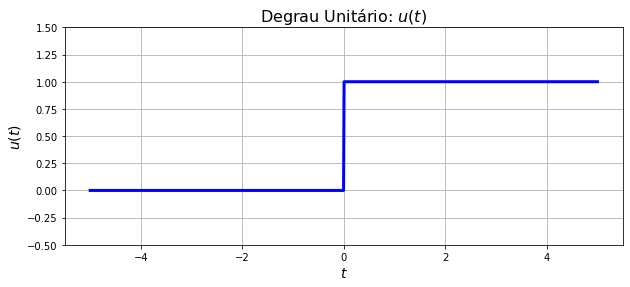

In [5]:
# Degrau Unitário Contínuo (função de Heaviside)
t = linspace(-5,5,1000)
u = zeros(1000,dtype=float)      # degrau unitário: u(t)
u[t>=0] = 1.                     # usando recursos da programação funcional

figure(figsize=(10, 4))          
plot(t,u,linewidth=3,color='b'); axis((-5.5,5.5,-0.5,1.5)); grid(True)
xlabel('$t$',fontsize=14); ylabel('$u(t)$',fontsize=14); title(u'Degrau Unitário: $u(t)$',size=16);

Este sinal pode representar o fechamento de uma chave elétrica (interruptor) colocada em série com uma carga e uma fonte de alimentação $v_S$, conforme Figura 2. Se o fechamento da chave ocorrer no instante $t=0$, então:

$$v_{out}(t)=\left\{\begin{matrix}
0,\;\;\;-\infty\lt t\lt0\\ 
v_s,\;\;\;0\leq t<\infty
\end{matrix}\right.$$

<img src="img/circuito1.png" height=100 width=250>
<img src="img/circuito1_vout.png" height=150 width=300>
<figcaption><b>Figura 2</b> - Degrau unitário emula a tensão de saída ($v_{out}$) ao se abrir um Interruptor em Circuito Elétrico.</figcaption>

**<ul><li><p style="color:blue; background-color: rgb(231,245,249); font-family:verdana; font-size:15px">Rampa Unitária</p></li>**

O sinal **Rampa Unitária** de tempo contínuo é uma adaptação de uma reta afim, de coeficiente angular unitário, geralmente denotado por $r(t)$ e definido por:


$$r(t)=\left\{\begin{matrix}
t,\;\;t\geq0\\ 
0,\;\;t<0
\end{matrix}\right.$$

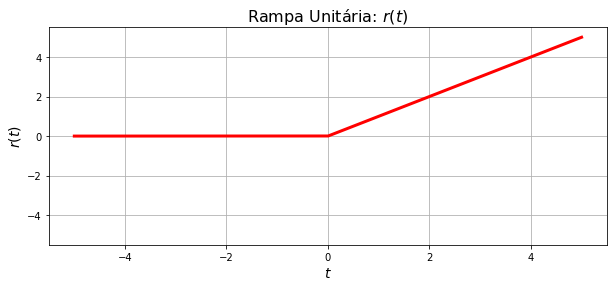

In [10]:
# Rampa unitária - reta afim (passa pela origem), de coeficiente angular unitário
t = linspace(-5,5,1000)
r = zeros(1000,dtype=float)
# r[t>=0] = t[500:]                         # forma 1
r = t * (t >= 0)                            # forma 2

figure(figsize=(10, 4))
plot(t,r,'r',linewidth=3); axis((-5.5,5.5,-5.5,5.5)); grid(True)
xlabel('$t$',fontsize=14); ylabel('$r(t)$',fontsize=14); title(u'Rampa Unitária: $r(t)$',size=16);

**<ul><li><p style="color:blue; background-color: rgb(231,245,249); font-family:verdana; font-size:15px">Pulso Retangular</p></li>**

O sinal **pulso retangular** de tempo contínuo pode ser descrito por:

$$ret(t)=\left \{  
\begin{matrix}  
0,\;\;\; -\infty \lt t \le -0,5  \\  
1,\;\;\; -0,5 \lt t \le 0,5      \\  
0,\;\;\; 0,5 \lt t \lt \infty \;\;\;\;   \\  
\end{matrix}\right.$$  

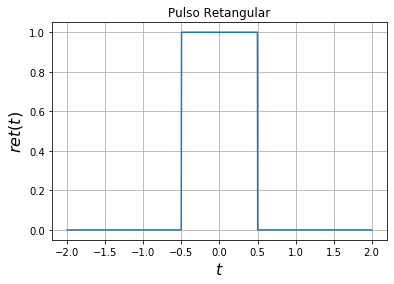

In [14]:
# Sinal Pulso Retangular (base unitária)
t = linspace(-2,2,1000)
ret = zeros(1000)                              # sinal pulso retangular
ret[(t>-0.5)*(t<=0.5)] = 1                     # patamar unitário

plot(t,ret); grid(True)
xlabel('$t$',fontsize=16); ylabel('$ret(t)$',fontsize=16); title('Pulso Retangular');

**<ul><li><p style="color:blue; background-color: rgb(231,245,249); font-family:verdana; font-size:15px">Pulso Triangular</p></li>**

O sinal **pulso triangular** de tempo contínuo, de base $L$, pode ser descrito por:

$$\Delta(t)=\left\{\begin{matrix}
t+L/2,\;\;-L/2 < t < 0\\
-t+L/2,\;\;0\leq t \lt L/2\\ 
0,\;\;\textrm{caso contrário}
\end{matrix}\right.$$


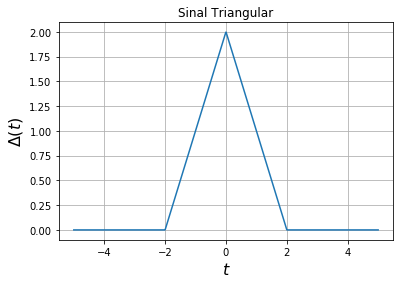

In [18]:
# Sinal Pulso Triangular de base L
t = linspace(-5,5,1000)
s = zeros(1000)                                      # sinal triangular
L = 4                                                # base L
s[(t>=-L/2)*(t<0)] = t[(t>=-L/2)*(t<0)] + L/2        # subida: -L/2 < t < 0
s[(t>=0)*(t<L/2)]  = -t[(t>=0)*(t<L/2)] + L/2        # descida: 0 < t < L/2

plot(t,s); grid(True)
xlabel('$t$',fontsize=16); ylabel('$\Delta(t)$',fontsize=16); title('Sinal Triangular');

**<ul><li><p style="color:blue; background-color: rgb(231,245,249); font-family:verdana; font-size:15px">Senoidal</p></li>**

O sinal **senoidal** de tempo contínuo de período $T=\frac{2\pi}{\omega}$ e fase $\theta$ pode ser descrito por:


$$x(t)=A.cos(\omega.t+\theta)$$

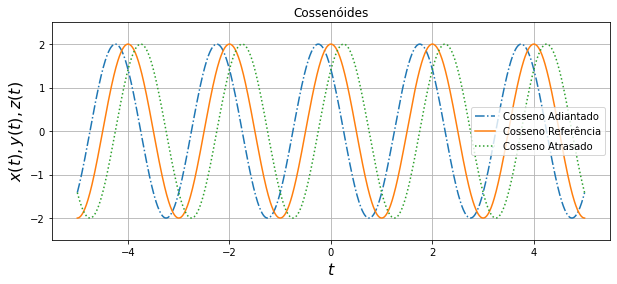

In [5]:
# Sinal Senoidal
t = linspace(-5,5,1000)
A = 2.; f = 0.5; omega = 2*pi*f; fase = pi/4
x = A*cos(omega*t + fase)                       # cossenóide 1 (azul)
y = A*cos(omega*t)                              # cossenóide 2 (laranja)
z = A*cos(omega*t - fase)                       # cossenóide 3 (verde)

figure(figsize=(10, 4))
plot(t,x,'-.',t,y,'-',t,z,':'); axis((-5.5,5.5,-2.5,2.5)); grid('on')
legend(('Cosseno Adiantado','Cosseno Referência','Cosseno Atrasado'))
xlabel('$t$',fontsize=16); ylabel('$x(t),y(t),z(t)$',fontsize=16); title(u'Cossenóides');

**<ul><li><p style="color:blue; background-color: rgb(231,245,249); font-family:verdana; font-size:15px">Senoidal Exponencialmente Amortecida</p></li>**

A multiplicação de uma senóide por um sinal exponencial decrescente resulta no sinal **Senoidal Exponencialmente Amortecido**, que é descrito pela equação:


$$x(t)=e^{-\alpha t}A.sen(\omega.t+\theta),\;\;\;\;\textrm{para}\;\;\;\alpha>0$$

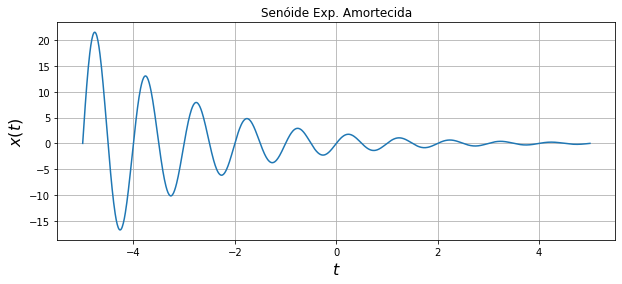

In [3]:
# Senóide Exponencialmente Amortecida
t = linspace(-5,5,1000)
A = 2.; f = 1; omega = 2*pi*f; fase = 0; alfa = 0.5
x = exp(-alfa*t)*A*sin(omega*t + fase)                  # cossenóide exponencialmente amortecida

figure(figsize=(10, 4))
plot(t,x); grid('on')
xlabel('$t$',fontsize=16); ylabel('$x(t)$',fontsize=16); title(u'Senóide Exp. Amortecida');

O gráfico anterior mostra a forma de onda do sinal exponencialmente amortecida com amplitude $\;A=2,\;f=1\,\textrm{Hz},\;\theta=\pi/4,\;\alpha=0,5$.  <p>Para o tempo crescente $t$, a amplitude da oscilação senoidal decresce de maneira exponencial, aproximando-se de zero no tempo infinito.

<div style="background-color:rgb(207, 250, 232); text-align:left; vertical-align: middle; padding:20px 0;">
    <p style="color:blue; font-family:verdana; font-size:20px"><b>3.2 Tamanho do Sinal</b></p>
</div>
O tamanho de um sinal se mede pela área sob a curva desse sinal ao quadrado, pois essa medida considera não somente a amplitude mas também a duração do sinal. Esta área corresponde à Energia do sinal.

**<p style="color:blue; background-color: rgb(231,245,249); font-family:verdana; font-size:15px">Energia</p>**
A energia do sinal deve ser finita para que seja uma medida significativa do tamanho do sinal, e para tanto, o sinal deve ter a seguinte característica: amplitude $\to$ 0 quando tempo $\to \infty$.  

Para um sinal $x(t)$ real: $$E_x=\int_{-\infty}^{+\infty}x^2(t)dt$$
Para um sinal $x(t)$ complexo: $$E_x=\int_{-\infty}^{+\infty}|x(t)|^2dt$$
**<p style="color:blue; background-color: rgb(231,245,249); font-family:verdana; font-size:15px">Potência</p>**
Para os casos em que a energia do sinal for infinita, pode-se usar a medida de potência (se ela for finita) para estimar o tamanho do sinal.

Para um sinal $x(t)$ real: $$P_x=\lim_{T\to \infty}\frac{1}{T}\int_{-T/2}^{+T/2}x^2(t)dt$$
Para um sinal $x(t)$ complexo: $$P_x=\lim_{T\to \infty}\frac{1}{T}\int_{-T/2}^{+T/2}|x(t)|^2dt$$

Observe que a Potência do sinal é uma média temporal do quadrado da amplitude (valor médio quadrático de $x(t)$). O **valor eficaz** ou **RMS** (*Root Mean Square*) de um sinal periódico (CORRENTE ou TENSÃO) está relacionado com o calor dissipado em uma resistência e pode ser calculado por: $$V_{rms}=\sqrt{P_x}$$

Quando um sinal $x(t)$ for **periódico**, $|x(t)|^2$ também será periódico, e nesses casos a potência poderá ser calculada pela média de $|x(t)|^2$ em um período:

Para um sinal $x(t)$ real: $$P_x=\frac{1}{T}\int_{-T/2}^{+T/2}x^2(t)dt$$
Para um sinal $x(t)$ complexo: $$P_x=\frac{1}{T}\int_{-T/2}^{+T/2}|x(t)|^2dt$$


<div style="background-color:rgb(207, 250, 232); text-align:left; vertical-align: middle; padding:20px 0;">
    <p style="color:blue; font-family:verdana; font-size:20px"><b>3.3 Operações Básicas com Sinais</b></p>
</div>

<h3 style="color:red">3.3.1 Variável Dependente (Amplitude):

<ul><li><b>Mudança da  Amplitude</b>:	$y(t)=c.x(t)$, onde $c$ é um valor escalar (fator de escala).</li>

<p>Os amplificadores eletrônicos realizam esse tipo de operação nos sinais. Um resistor também realiza essa operação, em que $x(t)$ é a corrente, $c$ é a resistência, e $y(t)$ é a tensão nos terminais do resistor.
<p>
<li><b>Adição</b>:	$y(t)=x_1(t)+x_2(t)$</li>

<p>Misturadores (*mixers*) realizam a soma de sinais, combinando sinais de instrumentos musicais e microfones (mixers de áudio).
<p>
<li><b>Multiplicação</b>: $y(t)=x_1(t).x_2(t)$</li>

<p>Sinais de rádio AM são obtidos a partir da multiplicação de um sinal de áudio (música, por exemplo) multiplicado por uma onda portadora (de alta frequência, ou seja, a frequência de sintonia da emissora de rádio).
<p>
<li><b>Diferenciação</b>:  $\frac{d}{dt}x(t)$</li>

A tensão nos terminais de um indutor é obtida através da diferenciação da corrente que o atravessa em relação ao tempo: $v_L(t)=L.\frac{d}{dt}i(t)$<p>

<li><b>Integração</b>: $\int_{-\infty}^t x(\tau)d\tau$</li>
<p>A tensão nos terminais de um capacitor é obtida através da integração da corrente que o atravessa em relação ao tempo: $v_C(t)=\frac{1}{C}\int_{-\infty}^t i(\tau)d\tau$

<h3 style="color:red">3.3.2 Variável Independente (tempo):

<ul><li><b>Deslocamento Temporal</b>:	$y(t)=x(t-t_0)$, se $t_0>0$ então $y(t)$ será uma versão atrasada no tempo do sinal original, $x(t)$, <br>e se $t_0<0$ então $y(t)$ será uma versão adiantada no tempo, de $x(t)$. 

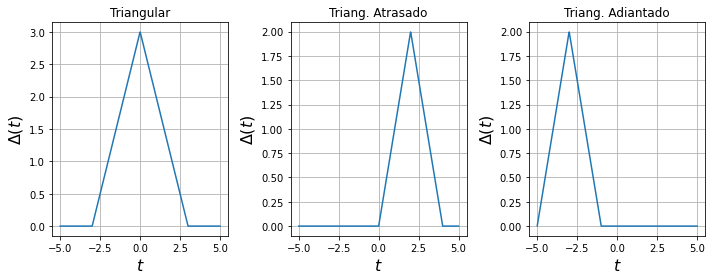

In [7]:
# %pylab inline
# Sinal Triangular - Atrasado e Adiantado no tempo
from numpy import linspace, zeros
from pylab import plot, grid, xlabel, ylabel, title, subplot, subplots, tight_layout 

def triang(t,base=2,t0=0):
  x = zeros(len(t))
  x[(t-t0>=-base/2)*(t-t0<0)] = t[(t>=-base/2)*(t<0)] + base/2        # subida: -base/2 < t < 0
  x[(t-t0>=0)*(t-t0< base/2)] = -(t[(t>=0)*(t<base/2)] - base/2)      # descida: 0 < t < base/2
  return x
  
t = linspace(-5,5,1000)
s = triang(t,6)                                                       # sinal triangular de base 6, centrado em 0 (zero)
satrasado = triang(t,4,2)                                             # sinal triangular de base 4, atrasado de 2 unid. tempo
sadiantado = triang(t,4,-3)                                           # sinal triangular de base 4, atrasado de 2 unid. tempo

subplots(figsize=(10,4))
subplot(131); plot(t,s); grid('on')
xlabel('$t$',fontsize=16); ylabel('$\Delta(t)$',fontsize=16); title('Triangular')
subplot(132); plot(t,satrasado); grid('on')
xlabel('$t$',fontsize=16); ylabel('$\Delta(t)$',fontsize=16); title('Triang. Atrasado')
subplot(133); plot(t,sadiantado); grid('on')
xlabel('$t$',fontsize=16); ylabel('$\Delta(t)$',fontsize=16); title('Triang. Adiantado')
tight_layout()

O sinal retangular $ret(t)$ pode ser obtido a partir da diferença de dois degraus unitários:

$$ret(t)=u(t+1/2)-u(t-1/2)$$

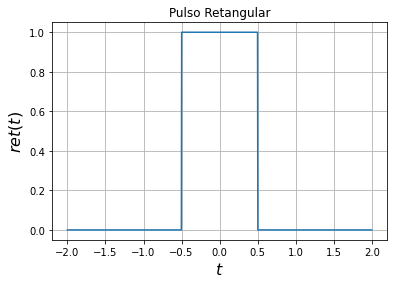

In [4]:
# Sinal Pulso Retangular (base unitária)
def degrau(t):
    return (t>=0)*1.

t = linspace(-2,2,1000)
ret = degrau(t+1/2) - degrau(t-1/2)            # # sinal pulso retangular

plot(t,ret); grid(True)
xlabel('$t$',fontsize=16); ylabel('$ret(t)$',fontsize=16); title('Pulso Retangular');

<ul><li><b>Mudança de Escala Temporal</b>:	$y(t)=x(a.t)$, se $a>1$ então $y(t)$ será uma versão comprimida no tempo, do sinal $x(t)$, <br>e se $0<a<1$ então $y(t)$ será uma versão expandida no tempo, de $x(t)$. 

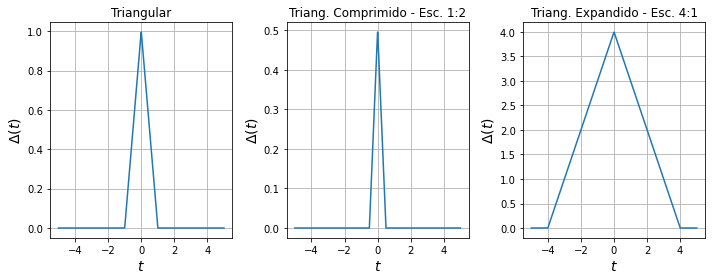

In [8]:
'''Sinal Triangular - Comprimido e Expandido no tempo'''
from numpy import linspace, zeros
from pylab import plot, grid, xlabel, ylabel, ylim, title, subplot, subplots, tight_layout, legend, figure

t = linspace(-5,5,1000)                         # sinal triangular
#s[(t>=-2)*(t<0)] = t[(t>=-2)*(t<0)] + 2        # subida: -2 < t < 0
#s[(t>=0)*(t<2)] = -(t[(t>=0)*(t<2)] - 2)       # descida: 0 < t < 2
s = triang(t)                                   # sinal triangular de base 2 s., centrado na origem

subplots(figsize=(10,4))
subplot(131); plot(t,s); grid('on')
xlabel('$t$',fontsize=14); ylabel('$\Delta(t)$',fontsize=14); title('Triangular')

sc = triang(t,base=1)                           # sinal triangular comprimido - escala 2
subplot(132); plot(t,sc); grid('on')
xlabel('$t$',fontsize=14); ylabel('$\Delta(t)$',fontsize=14); title('Triang. Comprimido - Esc. 1:2')

#se = zeros(1000)                               # sinal triangular estendido - escala 1/4
#se[0::2] = s[250:750]
#se[1::2] = s[250:750]
se = triang(t,base=8)
subplot(133); plot(t,se); grid('on')
xlabel('$t$',fontsize=14); ylabel('$\Delta(t)$',fontsize=14); title('Triang. Expandido - Esc. 4:1')
tight_layout()

<div style="background-color:rgb(207, 250, 232); text-align:left; vertical-align: middle; padding:20px 0;">
    <p style="color:blue; font-family:verdana; font-size:20px"><b>4. Exercícios</b></p>
</div>

<ol start="1">
<li>Trace o gráfico do sinal janela de base 3 e centrado na origem: <p>$w(t)=u(t+3/2)-u(t-3/2)$</li>
<p>
<li>Trace o gráfico do sinal janela de base 3 e centrado em $t=3/2$: <p>$w(t)=u(t)-u(t-3)$:</li>
<p>
<li>Trace o gráfico do oposto do sinal janela de base 3 e centrado em $t=3/2$: <p>$w(t)=-[u(t-3)-u(t)]=u(t)-u(t-3)$:</li>
<p>
<li>Trace o gráfico do sinal janela de base 3 e centrado em $t=3/2$ revertido temporalmente: <p>$w(-t)=u(-t-3)-u(-t)$:</li>
<p>
<li>Trace o sinal $p(t)=20.t\,/\,(t^2+4)$, para $0 \le t \le 10$; <p>e calcule o tempo em que o sinal apresenta amplitude maior que 4.</li>